## EDA on SPAM Messages

In [1]:
import pandas as pd

In [17]:
file_path: str = "data/SMSSpamCollection"

df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


TODO Sanity checks: Read the readme file in the data folder. How could we check if the data is read correctly?

In [18]:
len(df) # number of rows

5572

TODO Check if values are null? (If labels or text are null, remove the rows)

TODO describe the data statistically using pandas
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

### Text Analysis

In [24]:
def preprocess_text(text: str):
    return text.split()

In [25]:
preprocessed_column: str = "preprocessed_text"
text_column : str = 'text'

# tokenize and normalize text
df[preprocessed_column] = df[text_column].apply(preprocess_text)

<Axes: ylabel='Frequency'>

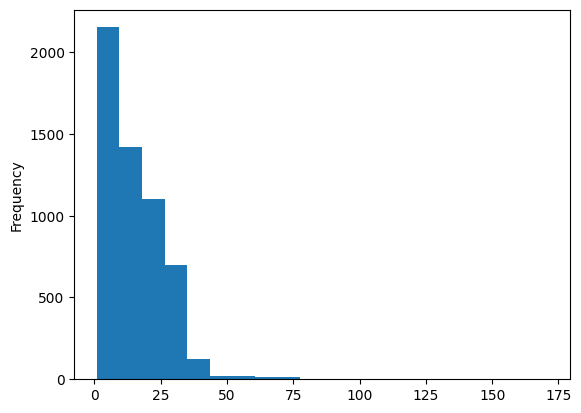

In [31]:
# TODO: add diagram title, tiltes for X/Y

df[preprocessed_column].apply(len).plot(kind="hist", bins=20)

In [35]:
# TODO count the least frequent terms
df.explode(preprocessed_column)[preprocessed_column].value_counts()[:20]

preprocessed_text
to      2145
you     1626
I       1469
a       1337
the     1207
and      858
in       800
is       788
i        748
u        698
for      650
my       630
of       592
me       561
your     561
on       488
have     477
2        457
that     422
it       397
Name: count, dtype: int64

In [ ]:
# TODO many of the top frequent words are stopwords. Remove them using NLTK
# use the corpus module for that (https://www.nltk.org/howto/corpus.html#word-lists-and-lexicons)predictionprepre
#import nltk
#nltk.download('stopwords')


### Correlations

In [49]:
# take the 30 most frequent words, and correlate to labels
df_words_exploded = df.explode(preprocessed_column)
top_50_words: list[str] = df_words_exploded[preprocessed_column].value_counts()[:20].index.tolist()
top_50_words

['to',
 'you',
 'I',
 'a',
 'the',
 'and',
 'in',
 'is',
 'i',
 'u',
 'for',
 'my',
 'of',
 'me',
 'your',
 'on',
 'have',
 '2',
 'that',
 'it']

In [50]:
columns = ['is_spam']
df['is_spam'] = df['label']=='spam'

for token in top_50_words:
    token_column = f"{token}_count"
    df[token_column] = df[preprocessed_column].apply(lambda token_list: token_list.count(token))
    columns.append(token_column)

In [53]:
df[columns].corr()

,is_spam,to_count,you_count,I_count,a_count,the_count,and_count,in_count,is_count,i_count,...,for_count,my_count,of_count,me_count,your_count,on_count,have_count,2_count,that_count,it_count
is_spam,1.000000,0.240588,-0.042509,-0.143861,0.178562,0.015794,0.004763,-0.058565,0.046483,-0.111993,...,0.115976,-0.102202,0.020572,-0.085373,0.168246,0.117977,0.110635,0.170459,-0.060127,-0.057666
to_count,0.240588,1.000000,0.207554,0.134136,0.186883,0.177019,0.192547,0.069949,0.080412,0.098991,...,0.144796,0.085433,0.081669,0.116800,0.127609,0.069336,0.149263,-0.025382,0.129604,0.096054
you_count,-0.042509,0.207554,1.000000,0.234524,0.120675,0.160920,0.197583,0.065207,0.026014,0.102080,...,0.076721,0.095993,0.085488,0.164837,0.188027,0.044778,0.123872,-0.086519,0.179555,0.112248
I_count,-0.143861,0.134136,0.234524,1.000000,0.087838,0.112481,0.172260,0.078567,-0.017859,0.026353,...,0.063682,0.238503,0.057129,0.090593,0.089010,0.036661,0.078225,0.018096,0.109554,0.096101
a_count,0.178562,0.186883,0.120675,0.087838,1.000000,0.119957,0.118820,0.114249,0.097731,0.046695,...,0.111384,0.081207,0.191811,0.034968,0.011914,0.091759,0.172782,0.058988,0.098117,0.048875
the_count,0.015794,0.177019,0.160920,0.112481,0.119957,1.000000,0.222557,0.140775,0.155745,0.087703,...,0.138790,0.073974,0.204530,0.057077,0.042252,0.146968,0.121754,-0.003990,0.157787,0.135554
and_count,0.004763,0.192547,0.197583,0.172260,0.118820,0.222557,1.000000,0.100598,0.081679,0.120495,...,0.141615,0.164868,0.100426,0.132630,0.094075,0.087951,0.119935,-0.043395,0.133331,0.133029
in_count,-0.058565,0.069949,0.065207,0.078567,0.114249,0.140775,0.100598,1.000000,0.031456,0.022480,...,0.041791,0.074201,0.079298,0.038540,-0.007310,0.010154,0.038602,0.044883,0.086918,0.078376
is_count,0.046483,0.080412,0.026014,-0.017859,0.097731,0.155745,0.081679,0.031456,1.000000,0.038450,...,0.081048,0.065301,0.129060,-0.011621,0.009282,0.049761,0.052191,0.032308,0.076853,0.081892
i_count,-0.111993,0.098991,0.102080,0.026353,0.046695,0.087703,0.120495,0.022480,0.038450,1.000000,...,0.037822,0.089944,0.040030,0.068547,-0.020018,0.039162,0.106133,0.010518,0.089925,0.086226


<Axes: >

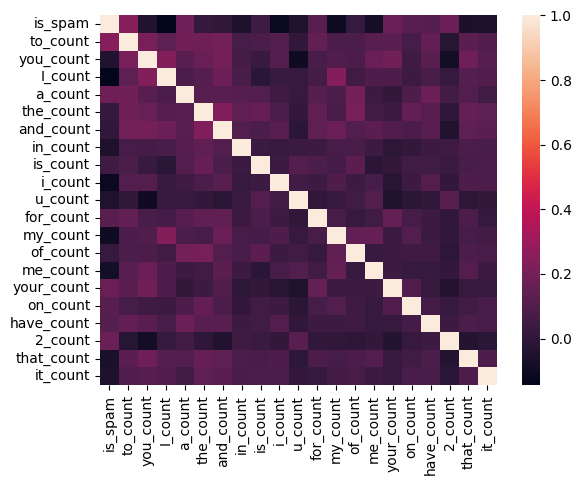

In [54]:
import seaborn

seaborn.heatmap(df[columns].corr())

In [ ]:
# save data to csv
df.to_csv('data/prepared_sms_data.csv', index=False)